In [1]:
%%capture
!rm -rf data/*
!unzip data.zip -d data/
!pip install --no-cache-dir pyldavis
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import pickle
import glob
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import random
%matplotlib inline

In [2]:
#list of all article xml file pathenames
all_files = glob.glob('GodesData/GodesLadyBook_ProcDocs/*.xml')

#for filename in all_files:
    #print(filename)

In [3]:
type(all_files[0]) #all files is an array of strings
len(all_files)

6300

In [ ]:
tree = ET.ElementTree(file='GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO1830070051.00051.proc.xml')
root = tree.getroot()
body = root.find('body')
body_children = body.getchildren()
body_children
for val_child in body_children:
    print("new child ")
    print(val_child)
    vkids = val_child.getchildren()
    for k in vkids:
        print(k)
        print("tail : ")
        print(k.tail)
    #print(val_child)
    #print( vkids)
#br/ is just one line and doesn't have an end tag            

In [ ]:
tre = ET.ElementTree(file='GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO1865120055.08276.proc.xml')
rot = tre.getroot()
boy = rot.find('body')
boy_children = boy.getchildren()

for val_child in boy_children:
    kids = val_child.getchildren()
    for k in kids:
        print(k)
        print("tail : ")
        print(k.tail)

In [ ]:
tr = ET.ElementTree(file='GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO1863060051.06214.proc.xml')
rt = tr.getroot()
by = rt.find('body')
by_children = by.getchildren()
by_children
by_children
for val_child in by_children:
    kids = val_child.getchildren()
    for k in kids:
        print(k)
        print("tail : ")
        print(k.tail)
    #print(val_child)
         #print(val_kids)
    #print(val_kids)


In [ ]:
rt.find('article-meta').find('publication-date').text
rt.find('article-meta').find('article-title').text


In [ ]:
tree 

In [ ]:
tr

In [41]:
eTree_arr = make_array()
index = 0
pathNames = all_files
dates = make_array()
article_titles = make_array()
#make a table of pathname, date, article titles
for path_name in all_files:
    eTree_xml = ET.ElementTree(file = path_name)
    #with open(path_name) as f:
        #xml_file= ET.fromstring(f.read().encode())
    #how to get each etree separarely, it's not reading a full xml file as 1 et, it's splitting it up 
    #print(str(index) + " " + xml_file.tag)
    eTree_arr = np.append(eTree_arr, eTree_xml)
    date = eTree_xml.getroot().find('article-meta').find('publication-date').text
    article_title = eTree_xml.getroot().find('article-meta').find('article-title').text
    dates = np.append(dates, date)
    article_titles = np.append(article_titles, article_title.lower())

    

#etree_arr is an array of all xml etrees

In [42]:
len(eTree_arr)

6300

In [43]:
len(dates)

6300

In [44]:
len(article_titles)

6300

In [45]:
years = make_array()


for date_string in dates:
    arr =  [int(s) for s in date_string.split() if s.isdigit()]
    year = arr[0]
    years = np.append(years, year)
   #print(arr)
   #print(len(date_string))
   #year_string =(date_string.split(','))[1].strip()
   
  # year = int(year_string)
   #print(type(year))
    #ears = np.append(years, year)


len(years)


6300

In [46]:
meta_table = Table().with_columns(
    'Article Title', article_titles,
    'Date', dates,
    'Year', years,
    'ETrees', eTree_arr,
    'Pathname', pathNames)
meta_table
#the articles already seem to be in random order and not organized by date

Article Title,Date,Year,ETrees,Pathname
"imposters about.— a woman calling herself ""addie craven, ""","April, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
infant's slipper,"November, 1850",1850,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18501 ...
fancy belt,"April, 1861",1861,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18610 ...
our musical column,"June, 1863",1863,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18630 ...
fetching the doctor,"June, 1863",1863,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18630 ...
"butterflies for collars, cuffs, and handkerchiefs. name ...","June, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
coatee dress,"February, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
written for the lady's book.,"April, 1840",1840,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18400 ...
superior card photographs for albums. 8,"May, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
large country residence in the italian style,"May, 1861",1861,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18610 ...


In [59]:
meta_table.group('Year')
#should I only choose 350 random articles from each of the later years, to be able to compare the years; so i have the similar number of articles? 
#so there's not so much of weight of the later years

Year,count
1830,304
1840,338
1850,475
1860,913
1861,904
1862,896
1863,860
1864,812
1865,798


In [63]:
#now put all the contents into 1 big list of strings
total_content_strings = []
for eTree in eTree_arr:
    root = eTree.getroot()
    body = root.find('body')
    body_children = body.getchildren()
    for val_child in body_children:
        
        vkids = val_child.getchildren()
        for k in vkids:
            content = k.tail
            total_content_strings.append(content)
        
    

In [ ]:
len(total_content_strings)

In [ ]:
for i in total_content_strings:
    #takes wayy too long, over 8 min
    print(i)

In [49]:
#get rid of all the "None" values
count = 0
final_strings = []
for i in total_content_strings:
    if i!= None and i != '\n':
        final_strings.append(i)



In [50]:
type(final_strings)

list

In [ ]:
len(final_strings)

In [51]:
count_vect = CountVectorizer(max_features=5000, stop_words='english', max_df=0.80, min_df=5)
random.shuffle(final_strings) #shuffle the final strings list
train_strings = final_strings[:71860]
test_strings = final_strings[71860:]

In [10]:
train_strings[:10]

['\nBob chuckled. "Had him there," he muttered beneath his breath.',
 '\nIt seems that he had a glimpse of me; for he shouted, angrily, through that orifice beloved of eavesdroppers, "Say, old fellow! if this is the way you treat your friends, I\'m off!"',
 '\nBen did not quite relish the idea of being placed in such amiable juxtaposition with the lieutenant. He therefore deliberated with an air of intense wisdom— ',
 '\n"Oh, he hears all the large scholars; and just before school is out every day, he tells us that he is sorry that he had to omit so many lessons to-day, and that next term he will have an assistant; but I\'d like to know what we are going to do this term?"',
 '\nFig. 11.—A waved bow of hair, to be worn over the brow.',
 '\nNo path through life where press our feet ',
 '\nCUP CAKE.— Five cups of flour, one cup of treacle, one cup of cream, one cup of sugar, three cups of currants, three cups of raisins, a quarter of a pound of candied-peel, four eggs well beaten, one tea

In [52]:
dtm = count_vect.fit_transform(train_strings)
dtm_feature_names = count_vect.get_feature_names()
dtm_feature_names[:10]


['00', '000', '10', '10th', '11', '11th', '12', '12th', '13', '13th']

In [53]:
len(dtm_feature_names)

5000

In [ ]:
#dtm_tb = Table(dtm_feature_names).with_rows(dtm.toarray())  dont need
#dtm_tb.show(5) 

In [ ]:
#from sklearn.decomposition import LatentDirichletAllocation


In [54]:
lda = LatentDirichletAllocation(n_components=7, max_iter=5)
np.random.seed(0)

In [55]:
lda_model = lda.fit(dtm)

/srv/app/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [56]:
pickle.dump((lda, lda_model, dtm, count_vect), open('7-topics.pkl', 'wb'))
lda, lda_model, dtm, count_vect = pickle.load(open('7-topics.pkl', 'rb'))
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, dtm, count_vect)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      23.232338        1       1 -0.227921  0.043677
5      20.272056        1       2 -0.211614  0.019255
0      15.247289        1       3 -0.029001 -0.099977
2      12.382115        1       4 -0.101074 -0.133385
4      11.388532        1       5  0.235597  0.190909
6       9.282065        1       6  0.088322  0.268783
3       8.195606        1       7  0.245691 -0.289261, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
1221  Default  2892.000000           did  2892.000000  30.0000  30.0000
2893  Default  4006.000000           mrs  4006.000000  29.0000  29.0000
2461  Default  2758.000000          know  2758.000000  28.0000  28.0000
4505  Default  2107.000000         think  2107.000000  27.0000  27.0000
4549  Default  3849.000000          time  3849.000000  26.0000  26.0000
4872  Default  2711.000000         white  2711.000000  25.0000  25.0000
2827  Default  2825.000000          miss  2825.000000  24.0000  24.0000
3045  Default  2782.000000           old  2782.000000  23.0000  23.0000
3815  Default  5254.000000          said  5254.000000  22.0000  22.0000
4828  Default  1840.000000         water  1840.000000  21.0000  21.0000
2960  Default  2601.000000           new  2601.000000  20.0000  20.0000
2041  Default  2260.000000          half  2260.000000  19.0000  19.0000
494   Default  1887.000000         black  1887.000000  18.0000  18.0000
2699  Default  2616.000000           man  2616.000000  17.0000  17.0000
2103  Default  2723.000000         heart  2723.000000  16.0000  16.0000
2892  Default  3645.000000            mr  3645.000000  15.0000  15.0000
1993  Default  2346.000000         great  2346.000000  14.0000  14.0000
1323  Default  1775.000000         dress  1775.000000  13.0000  13.0000
3043  Default  1640.000000            oh  1640.000000  12.0000  12.0000
3917  Default  2146.000000          sent  2146.000000  11.0000  11.0000
1289  Default  1636.000000           don  1636.000000  10.0000  10.0000
4024  Default  1564.000000          silk  1564.000000   9.0000   9.0000
2873  Default  2203.000000        mother  2203.000000   8.0000   8.0000
871   Default  2183.000000          come  2183.000000   7.0000   7.0000
1600  Default  2123.000000          eyes  2123.000000   6.0000   6.0000
2193  Default  1888.000000         house  1888.000000   5.0000   5.0000
2609  Default  5312.000000        little  5312.000000   4.0000   4.0000
1910  Default  1135.000000          girl  1135.000000   3.0000   3.0000
4939  Default  2004.000000          work  2004.000000   2.0000   2.0000
4993  Default  2684.000000         young  2684.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
442    Topic7   781.241892       believe   782.099777   2.5005  -4.5723
4045   Topic7   761.794962           sir   762.651320   2.5004  -4.5975
718    Topic7   754.471778         cents   755.326901   2.5004  -4.6071
3386   Topic7   743.495895         price   744.351648   2.5004  -4.6218
3215   Topic7   673.242586  philadelphia   674.097771   2.5003  -4.7210
4096   Topic7   670.812925         smile   671.671697   2.5003  -4.7247
3779   Topic7   633.127974           row   633.985691   2.5002  -4.7825
1363   Topic7   565.410161         early   566.268294   2.5001  -4.8956
1699   Topic7   557.090323           fig   557.948145   2.5000  -4.9104
1497   Topic7   482.770055            er   483.625005   2.4998  -5.0536
29     Topic7   472.264565            25   473.119506   2.4998  -5.0756
3142   Topic7   461.868670          pass   462.727615   2.4997  -5.0979
2480   Topic7   454.772955          land   455.630473   2.4997  -5.1134
166    Topic7   445.283744            ah   446.140272   2.4997  -5.1344
4380   Topic7   433.753879           sun   434.611106   2.4996  -5.1607
3877   Topic7  

In [19]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(topic_idx, " ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [20]:
display_topics(lda, dtm_feature_names, 20)

0 new lady book work year great best evening asked philadelphia city number york character author read price present ladies cents
1 mr heart life thought came mother said child father hand years world little old miss time poor voice soon saw
2 love beautiful bright light care nature thou john sat thee earth feet kept following age eye ask heaven lay hope
3 said good know young home eyes come did say time little like house day think man mrs don way room
4 white black dress silk round velvet blue green flowers trimmed plain thy hair long feel gold lace dark chain work
5 make ll shall till children miss friend yes going ve says table let boy little hour open left tears like
6 sent water half mrs pattern little true sugar cold pound add small pleasure brown let boil butter spring place minutes


In [112]:
doc_topic = lda.transform(dtm)
list_of_doctopics = [doc_topic[n] for n in range(len(doc_topic))]
list_of_doctopics[71859] # propotion of each topic in the certain article number given, only till length of train_strings given into dtm, which is half

array([ 0.14285714,  0.14285714,  0.14285714,  0.14285714,  0.14285714,
        0.14285714,  0.14285714])

In [96]:
df = pd.DataFrame(list_of_doctopics)
df.head(n=5) # columns are topics and rows are documents/articles, shows probabilty of each topic in a document, we just show the first 5 documents here

,0,1,2,3,4,5,6
0,0.010997,0.162585,0.010998,0.010997,0.011003,0.782431,0.010989
1,0.004764,0.004792,0.004763,0.004763,0.004765,0.971347,0.004805
2,0.561120,0.227894,0.168205,0.001488,0.001489,0.001490,0.038314
3,0.028571,0.228570,0.028571,0.028731,0.628413,0.028571,0.028571
4,0.047619,0.047619,0.047619,0.047619,0.047619,0.380951,0.380953


In [97]:
meta = meta_table.to_df() 
meta[df.columns] = df  #our df is made from doctopics that in total are half of the length of meta_table> how is this still working?
meta

,Article Title,Date,Year,ETrees,Pathname,0,1,2,3,4,5,6
0,"imposters about.— a woman calling herself ""ad...","April, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.010997,0.162585,0.010998,0.010997,0.011003,0.782431,0.010989
1,infant's slipper,"November, 1850",1850.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.004764,0.004792,0.004763,0.004763,0.004765,0.971347,0.004805
2,fancy belt,"April, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.561120,0.227894,0.168205,0.001488,0.001489,0.001490,0.038314
3,our musical column,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.028571,0.228570,0.028571,0.028731,0.628413,0.028571,0.028571
4,fetching the doctor,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.047619,0.047619,0.047619,0.047619,0.047619,0.380951,0.380953
5,"butterflies for collars, cuffs, and handkerchi...","June, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.028571,0.228450,0.028571,0.628685,0.028571,0.028572,0.028579
6,coatee dress,"February, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.071429,0.071429,0.571429,0.071429,0.071429,0.071429,0.071429
7,written for the lady's book.,"April, 1840",1840.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.089629,0.010204,0.010213,0.010204,0.010204,0.859337,0.010208
8,superior card photographs for albums. 8,"May, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.011912,0.804863,0.011914,0.011905,0.011906,0.135595,0.011905
9,large country residence in the italian style,"May, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.246732,0.210372,0.028573,0.028604,0.228562,0.028587,0.228569


In [24]:
meta.corr()

,Year,0,1,2,3,4,5,6
Year,1.000000,-0.000539,0.005910,-0.002218,0.007226,-0.005460,-0.006481,-0.002936
0,-0.000539,1.000000,-0.211111,-0.117879,-0.210656,-0.162523,-0.126173,-0.131492
1,0.005910,-0.211111,1.000000,-0.167195,-0.176198,-0.261782,-0.174501,-0.241233
2,-0.002218,-0.117879,-0.167195,1.000000,-0.193236,-0.095536,-0.106097,-0.115762
3,0.007226,-0.210656,-0.176198,-0.193236,1.000000,-0.261427,-0.135314,-0.259592
4,-0.005460,-0.162523,-0.261782,-0.095536,-0.261427,1.000000,-0.101107,-0.075278
5,-0.006481,-0.126173,-0.174501,-0.106097,-0.135314,-0.101107,1.000000,-0.078829
6,-0.002936,-0.131492,-0.241233,-0.115762,-0.259592,-0.075278,-0.078829,1.000000


In [25]:


years1860_on = meta[ meta['Year'] > 1859 ]
#&& meta['Year'] < 1861


years1860_on


,Article Title,Date,Year,ETrees,Pathname,0,1,2,3,4,5,6
0,"IMPOSTERS ABOUT.— A woman calling herself ""Ad...","April, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.006813,0.417518,0.106076,0.093412,0.006803,0.006807,0.362571
2,FANCY BELT,"April, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.028571,0.028571,0.028571,0.828451,0.028692,0.028571,0.028571
3,OUR MUSICAL COLUMN,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.015909,0.015877,0.015873,0.230826,0.015873,0.689759,0.015882
4,FETCHING THE DOCTOR,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.002305,0.031718,0.031376,0.096756,0.019508,0.778913,0.039425
5,"BUTTERFLIES FOR COLLARS, CUFFS, AND HANDKERCHI...","June, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.028578,0.028581,0.028571,0.028590,0.028571,0.028571,0.828537
6,COATEE DRESS,"February, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.007143,0.806887,0.057789,0.106678,0.007145,0.007213,0.007145
8,SUPERIOR CARD PHOTOGRAPHS FOR ALBUMS. 8,"May, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.005496,0.005496,0.005495,0.967011,0.005495,0.005512,0.005496
9,LARGE COUNTRY RESIDENCE IN THE ITALIAN STYLE,"May, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.023915,0.856913,0.023810,0.023852,0.023810,0.023810,0.023892
10,THE CASKET OF TEMPERANCE,"February, 1864",1864.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.015873,0.120968,0.799665,0.015875,0.015873,0.015873,0.015873
11,LETTER TO THE EDITRESS. NEW YORK,"May, 1864",1864.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.012987,0.232831,0.012987,0.641575,0.073643,0.012990,0.012987


In [26]:
type(meta.plot)

pandas.tools.plotting.FramePlotMethods

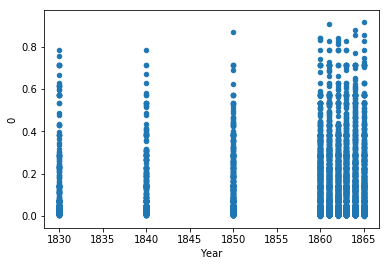

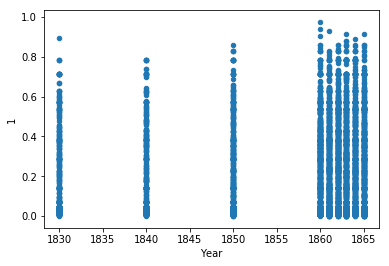

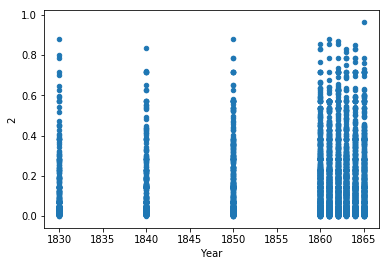

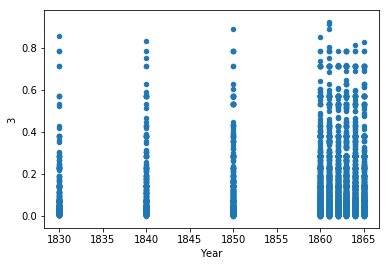

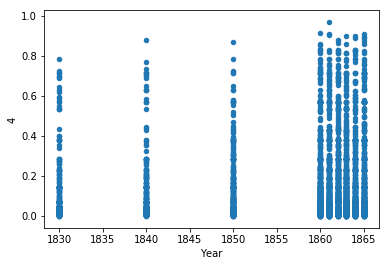

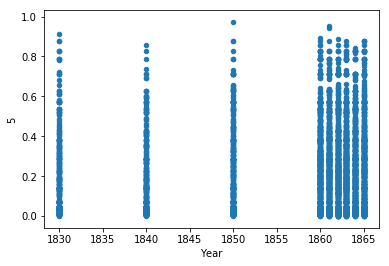

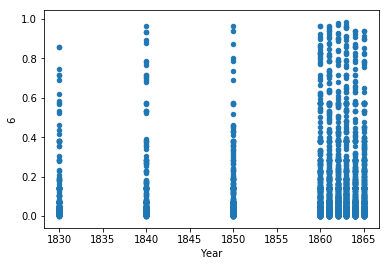

In [99]:
for i in np.arange(7):
    meta.plot.scatter(x='Year', y=i)

In [36]:
#axes = plt.gca()
#axes.set_xlim([1859,1866])
#axes.set_ylim([1860,1865])

#plt.plot(meta, np.sinc(meta), c = 'k')
#plt.show()


In [37]:
lda_model.perplexity(count_vect.transform(test_strings))
#The lower the perplexity, the better the fit of the model. 
#Unfortunately, it has been shown time and again that minimizing perplexity does not actually separate topics into coherent groups that humans would.
#perplexity is broken

2722.1944376271817

In [34]:
array_sums = make_array()
for i in np.arange(7):
    sum_for_year = sum(meta[i])
    array_sums = np.append(array_sums, sum_for_year)

array_sums 

array([  757.56091943,   802.96966625,   846.28193031,   956.25578554,
         825.07295431,  1090.95418101,  1020.90456315])

In [81]:
#for topic  
array_of_years = make_array(1830, 1840, 1850, 1860, 1861, 1862, 1863, 1864, 1865 )
total_list_of_prop = []
for i in np.arange(7):
    array_of_prop_i = make_array()
    for year in array_of_years:
        one_year_prop = meta[ meta['Year'] == year]
        avg_prop_for_year = np.average(one_year_prop[i])
        array_of_prop_i = np.append(array_of_prop_i, avg_prop_for_year)
    #print(array_of_prop_i)
    total_list_of_prop.append(array_of_prop_i)
total_list_of_prop

[array([ 0.12913063,  0.14640227,  0.14377025,  0.13921421,  0.13904623,
         0.14178389,  0.13683375,  0.132326  ,  0.13964757]),
 array([ 0.19771152,  0.20828157,  0.1941917 ,  0.2181833 ,  0.19763848,
         0.20399199,  0.20193955,  0.20361872,  0.20534586]),
 array([ 0.12128205,  0.11290498,  0.10682142,  0.11099441,  0.10838599,
         0.10998498,  0.1231893 ,  0.1121928 ,  0.11588792]),
 array([ 0.2089372 ,  0.20845992,  0.20936463,  0.21136893,  0.22365808,
         0.2182859 ,  0.19980252,  0.2187675 ,  0.21187959]),
 array([ 0.12791322,  0.11334729,  0.12787613,  0.12568946,  0.11926538,
         0.12719366,  0.118198  ,  0.11386089,  0.12230222]),
 array([ 0.10898305,  0.11115045,  0.11039239,  0.09905864,  0.11136536,
         0.10290721,  0.11500995,  0.1115014 ,  0.10149643]),
 array([ 0.10604233,  0.09945352,  0.10758349,  0.09549105,  0.10064049,
         0.09585239,  0.10502694,  0.1077327 ,  0.1034404 ])]

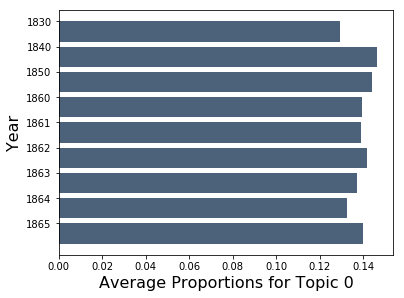

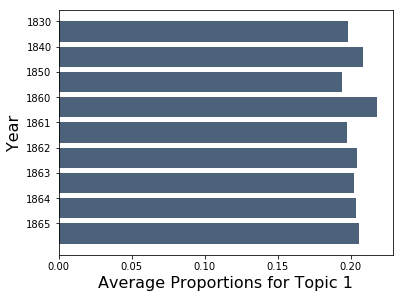

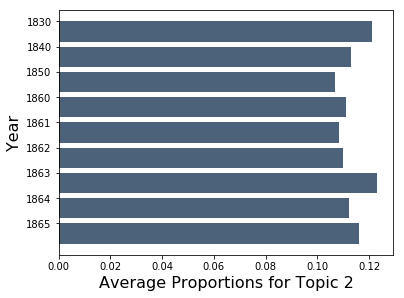

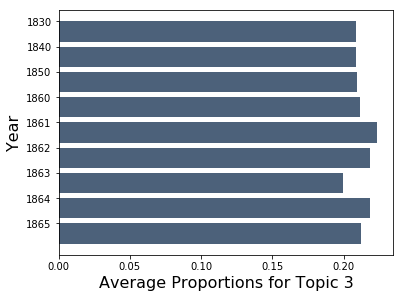

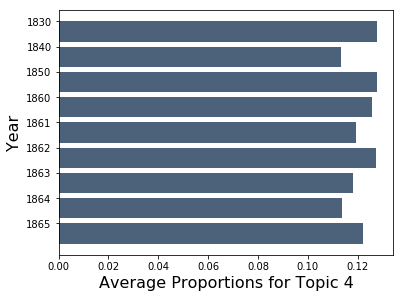

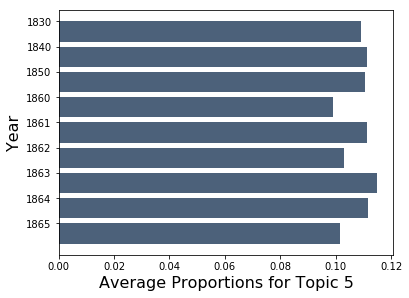

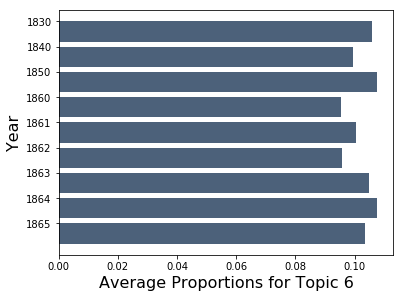

In [39]:
topic_num = 0
for arr in total_list_of_prop:
    prop_title = 'Average Proportions for Topic ' + str(topic_num)
    topic_table = Table().with_columns(
        'Year', array_of_years,
        prop_title, arr 
    
    )
    topic_table.barh('Year', prop_title)
    topic_num+=1

In [64]:
# i'll try topic modeling for the titles
title_strings = []
for article in article_titles:
    title_strings.append(article)
    
len(title_strings)

6300

In [66]:
count_vect2 = CountVectorizer(max_features=5000, stop_words='english', max_df=0.80, min_df=5)
random.shuffle(title_strings) #shuffle the title strings list
train_titles = title_strings[:3150]
test_titles = title_strings[3150:]

In [67]:
dtm2 = count_vect2.fit_transform(train_titles)
dtm_feature_names2 = count_vect2.get_feature_names()
dtm_feature_names2[:10]

['1826',
 '1840',
 '1864',
 '1865',
 '93nobody',
 '93the',
 'accepted',
 'advice',
 'agency',
 'ago']

In [68]:
lda2 = LatentDirichletAllocation(n_components=10, max_iter=5)
np.random.seed(0)

In [69]:
lda_model2 = lda2.fit(dtm2)

/srv/app/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [70]:
pickle.dump((lda2, lda_model2, dtm2, count_vect2), open('10 title-topics.pkl', 'wb'))
lda2, lda_model2, dtm2, count_vect2 = pickle.load(open('10 title-topics.pkl', 'rb'))
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model2, dtm2, count_vect2)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      14.552323        1       1  0.216027  0.164679
0      12.736153        1       2 -0.270951  0.170430
9      11.833730        1       3  0.187204  0.071694
5      11.719730        1       4 -0.045639 -0.151583
2       9.437978        1       5  0.049008 -0.247133
8       8.936124        1       6 -0.122480 -0.037495
1       8.912619        1       7  0.153137  0.157582
7       8.170206        1       8 -0.207432  0.102115
6       6.931189        1       9  0.051590 -0.122098
3       6.769948        1      10 -0.010463 -0.108192, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
216   Default  183.000000           lady  183.000000  30.0000  30.0000
46    Default  126.000000           book  126.000000  29.0000  29.0000
269   Default  121.000000            new  121.000000  28.0000  28.0000
149   Default   74.000000       fashions   74.000000  27.0000  27.0000
251   Default   60.000000  miscellaneous   60.000000  26.0000  26.0000
134   Default   94.000000     embroidery   94.000000  25.0000  25.0000
379   Default   62.000000          table   62.000000  24.0000  24.0000
126   Default   68.000000          dress   68.000000  23.0000  23.0000
173   Default   83.000000          godey   83.000000  22.0000  22.0000
291   Default   62.000000        pattern   62.000000  21.0000  21.0000
146   Default   48.000000          fancy   48.000000  20.0000  20.0000
422   Default   55.000000        written   55.000000  19.0000  19.0000
118   Default   53.000000    description   53.000000  18.0000  18.0000
292   Default   46.000000       patterns   46.000000  17.0000  17.0000
426   Default   58.000000          young   58.000000  16.0000  16.0000
117   Default   42.000000     department   42.000000  15.0000  15.0000
372   Default   41.000000    subscribers   41.000000  14.0000  14.0000
294   Default   76.000000   philadelphia   76.000000  13.0000  13.0000
53    Default   55.000000       braiding   55.000000  12.0000  12.0000
147   Default   48.000000        fashion   48.000000  11.0000  11.0000
262   Default   37.000000        musical   37.000000  10.0000  10.0000
300   Default   46.000000          plate   46.000000   9.0000   9.0000
104   Default   45.000000        crochet   45.000000   8.0000   8.0000
90    Default   34.000000         column   34.000000   7.0000   7.0000
425   Default   43.000000           york   43.000000   6.0000   6.0000
180   Default   33.000000           hair   33.000000   5.0000   5.0000
272   Default   34.000000         notice   34.000000   4.0000   4.0000
69    Default   40.000000        chapter   40.000000   3.0000   3.0000
370   Default   34.000000          style   34.000000   2.0000   2.0000
155   Default   39.000000      following   39.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
262   Topic10   36.643662        musical   37.507726   2.6694  -2.4936
90    Topic10   34.072951         column   34.936728   2.6676  -2.5663
408   Topic10   16.660169           wife   17.535998   2.6414  -3.2818
261   Topic10   20.957430          music   22.112797   2.6390  -3.0524
19    Topic10   14.115947       arranged   14.981059   2.6332  -3.4475
133   Topic10   11.226936    embroidered   12.091470   2.6185  -3.6765
346   Topic10   10.799709           sick   11.664007   2.6157  -3.7153
288   Topic10   10.331765          paris   11.195747   2.6124  -3.7596
36    Topic10   10.107821      beautiful   10.974591   2.6104  -3.7815
48    Topic10   10.061290         border   10.927120   2.6101  -3.7862
358   Topic10    9.936709         sonnet   10.800678   2.6093  -3.7986
178   Topic10    9.650664          great   10.514815   2.6069  -3.8278
32    Topic10    9.493801           ball   10.358701   2.6055  -3.8442
113   Topic10    9.481547          death   

In [71]:
display_topics(lda2, dtm_feature_names2, 20)

0 lady book written godey following composed articles correspondents piano accepted forte winter baby apron friend villa expressly lines hood sea
1 patterns style new embroidery latest robe flower song establishment jacket gentleman pocket words heart morning female good zouave knitting corner
2 miscellaneous fancy child little family cooking drawing marking flowers work alphabet number letters summer basket master lessons familiar black series
3 musical column music wife arranged embroidered sick paris beautiful border sonnet great ball death art dear husband cover time watch
4 embroidery dress pattern young braiding ladies day miss philadelphia agency school boarding braided pillow hale pincushion case cases year love
5 description fashion plate chapter spring steel novelties dresses home story house september christmas french october bonnets night march man november
6 hair woman letter lesson toilet letters english mat paper aunt directions trimming chemistry ornaments ladies city w

In [113]:
doc_topic2 = lda2.transform(dtm2)
list_of_doctopics2 = [doc_topic2[n] for n in range(len(doc_topic2))]
list_of_doctopics2[3149] # propotion of each topic in the certain article number given, is the length of train_titles, which is half of title_strings

array([ 0.03333333,  0.03333333,  0.7       ,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333])

In [92]:
df2 = pd.DataFrame(list_of_doctopics2)
df2 # columns are topics and rows are documents/articles, shows probabilty of each topic in a document, we just show the first 5 documents here

,0,1,2,3,4,5,6,7,8,9
0,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333
3,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.700000
4,0.025000,0.025000,0.025000,0.025000,0.025000,0.775000,0.025000,0.025000,0.025000,0.025000
5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
6,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
7,0.025011,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.774989,0.025000,0.025000
8,0.033333,0.033333,0.366667,0.033333,0.033333,0.033333,0.366667,0.033333,0.033333,0.033333
9,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000


In [102]:
meta_titles_prev =meta_table.to_df()
meta_titles_prev[df2.columns] = df2
meta_titles = meta_titles_prev[:3150] #fixed the NaN problem

In [103]:
meta_titles.corr()

,Year,0,1,2,3,4,5,6,7,8,9
Year,1.000000,0.017659,-0.037227,0.008307,0.011385,0.010460,-0.018859,-0.051968,0.025360,0.004972,0.017594
0,0.017659,1.000000,-0.118908,-0.127196,-0.095828,-0.154498,-0.148290,-0.113143,-0.117130,-0.143120,-0.118771
1,-0.037227,-0.118908,1.000000,-0.119751,-0.080957,-0.116544,-0.102046,-0.085172,-0.101555,-0.088140,-0.090128
2,0.008307,-0.127196,-0.119751,1.000000,-0.092845,-0.125939,-0.125441,-0.065302,-0.099471,-0.114632,-0.109976
3,0.011385,-0.095828,-0.080957,-0.092845,1.000000,-0.132742,-0.110196,-0.052912,-0.078693,-0.084580,-0.094822
4,0.010460,-0.154498,-0.116544,-0.125939,-0.132742,1.000000,-0.152732,-0.111296,-0.143688,-0.148891,-0.134540
5,-0.018859,-0.148290,-0.102046,-0.125441,-0.110196,-0.152732,1.000000,-0.110737,-0.118804,-0.103150,-0.110950
6,-0.051968,-0.113143,-0.085172,-0.065302,-0.052912,-0.111296,-0.110737,1.000000,-0.068529,-0.090378,-0.095311
7,0.025360,-0.117130,-0.101555,-0.099471,-0.078693,-0.143688,-0.118804,-0.068529,1.000000,-0.104159,-0.107041
8,0.004972,-0.143120,-0.088140,-0.114632,-0.084580,-0.148891,-0.103150,-0.090378,-0.104159,1.000000,-0.119903


In [104]:
len(meta_titles.index)

3150

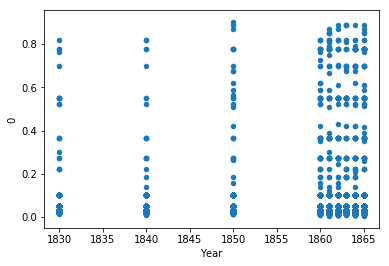

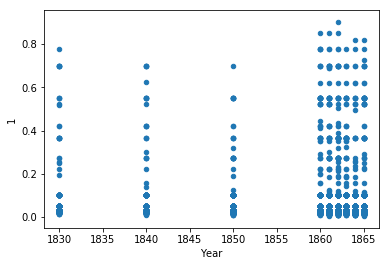

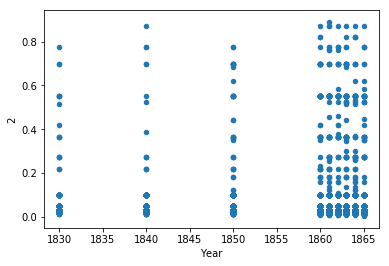

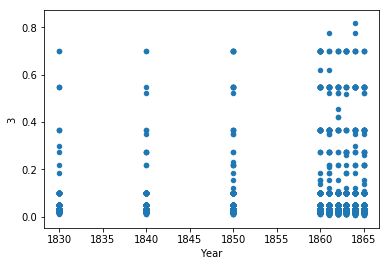

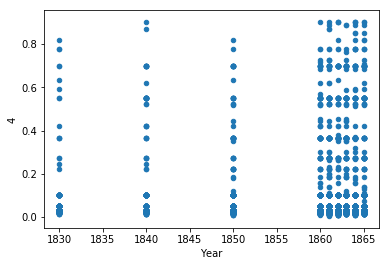

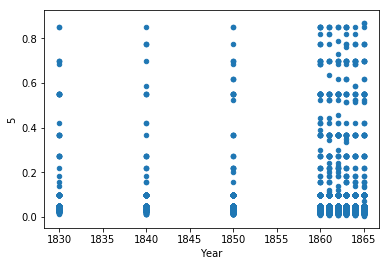

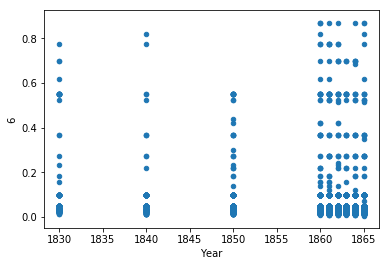

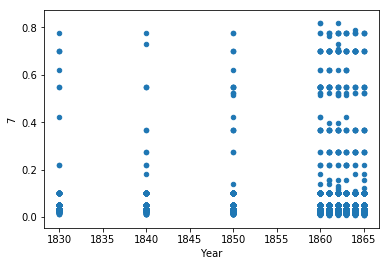

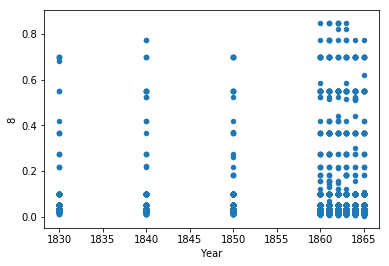

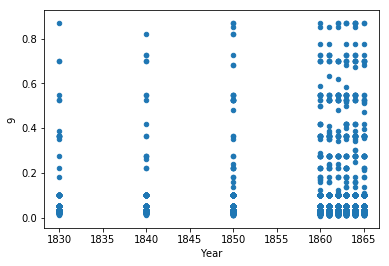

In [105]:
for i in np.arange(10):
    meta_titles.plot.scatter(x='Year', y=i)


In [107]:
#for topic  
array_of_years = make_array(1830, 1840, 1850, 1860, 1861, 1862, 1863, 1864, 1865 )
list_of_title_prop = []
for i in np.arange(10):
    array_of_prop_i = make_array()
    for year in array_of_years:
        one_year_prop = meta_titles[ meta_titles['Year'] == year]
        avg_prop_for_year = np.average(one_year_prop[i])
        array_of_prop_i = np.append(array_of_prop_i, avg_prop_for_year)
    #print(array_of_prop_i)
    list_of_title_prop.append(array_of_prop_i)
list_of_title_prop

[array([ 0.10874412,  0.09749038,  0.10615813,  0.10231569,  0.10689154,
         0.09968107,  0.10327099,  0.11345063,  0.13319038]),
 array([ 0.11620362,  0.11323527,  0.08040484,  0.09757613,  0.09611199,
         0.1030995 ,  0.08528385,  0.07418443,  0.10030693]),
 array([ 0.09228498,  0.087062  ,  0.10821457,  0.10076056,  0.0969209 ,
         0.10198401,  0.10869244,  0.09412474,  0.09157804]),
 array([ 0.0763008 ,  0.07663149,  0.09644897,  0.09821864,  0.08242079,
         0.08120665,  0.08096326,  0.09114031,  0.08478188]),
 array([ 0.0990515 ,  0.16259196,  0.1269141 ,  0.11292113,  0.13128559,
         0.12085915,  0.13279643,  0.13446112,  0.1371112 ]),
 array([ 0.13051503,  0.10783509,  0.10447165,  0.11826893,  0.09892085,
         0.10843088,  0.11582878,  0.10343922,  0.10826267]),
 array([ 0.11222719,  0.07673486,  0.0892008 ,  0.08619182,  0.08247186,
         0.07947481,  0.06898031,  0.07533552,  0.07642027]),
 array([ 0.07906271,  0.07640964,  0.08787959,  0.09354

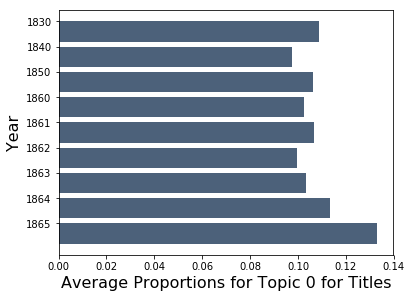

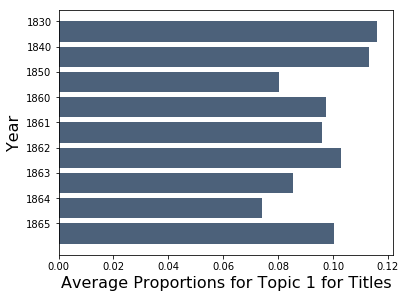

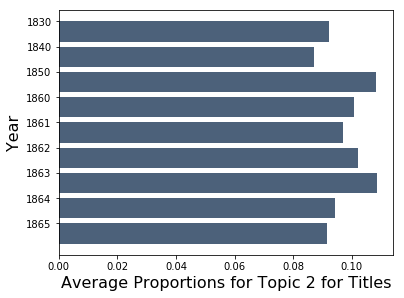

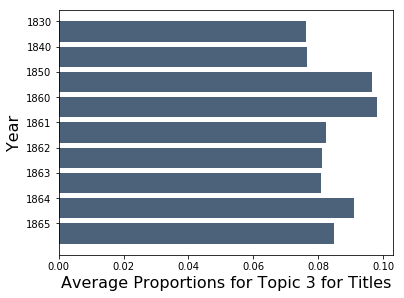

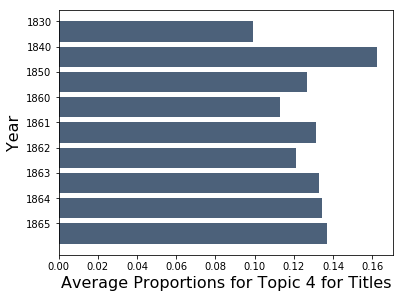

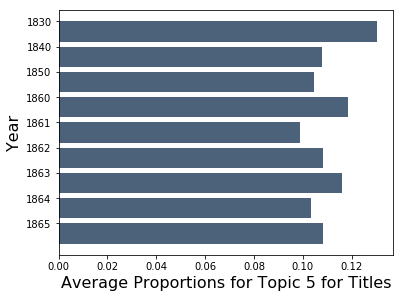

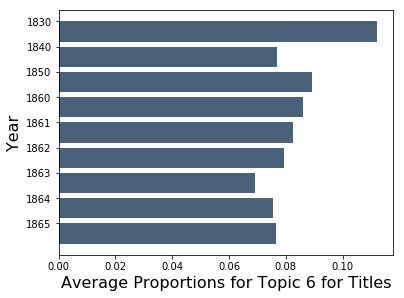

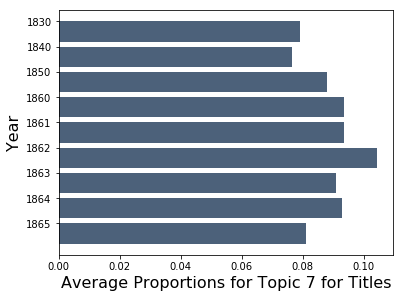

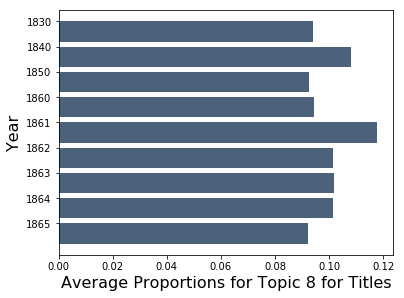

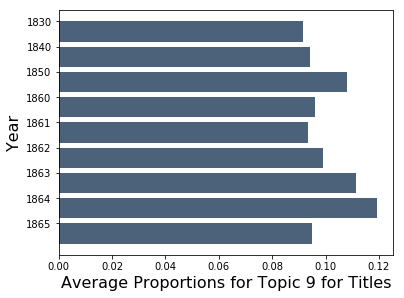

In [114]:
title_topic_num = 0
for arr in list_of_title_prop:
    prop_title = 'Average Proportions for Topic ' + str(title_topic_num) + " for Titles"
    topic_table = Table().with_columns(
        'Year', array_of_years,
        prop_title, arr 
    
    )
    topic_table.barh('Year', prop_title)
    title_topic_num+=1